In [8]:
sys. version

'3.11.5 (main, Sep 11 2023, 08:17:37) [Clang 14.0.6 ]'

# Team Members: Aitor Gonzalez (49091707), Palmer Nelson (47066829), Abdul Wasay (49121481)

Dallas Animal Shelter Data pertains to operational processes carried out by shelter personnel who assist citizens by receiving surrendered and stray animals, facilitating adoptions, transferring animals to rescue groups, and providing care to the animals in the shelter every day. Shelter personnel document their work using Chameleon software, an animal shelter management program. The Dallas Animal Shelter Data is updated daily to help citizens better understanding the operational processes that the shelter personnel perform daily for the animals and citizens of the City of Dallas. “Helping Dallas be a safe, compassionate, and healthy place for people and animals”. The period covered goes from October 01, 2017 to Present. 
The dataset that we are using specifically pertains to Q2, Q3 and Q4 of 2019 and Q1 of 2020. 

The types of questions we intend to answer using this dataset are:
    
How do attributes affect adoption outcome
  a.    How does breed affect adoption outcome
  b.    How does species affect adoption outcome
  c.    How does timing affect adoption outcome 
  d.    How does location affect adoption outcome 
What effects length of stay in the shelter
Difference in outcomes based on intake health conditions
Are there trends in incoming animals based on time
Later: Use other year data sets to see difference in numbers between COVID years vs before and after

# Business Understanding

Analyzing the outcome of an animal shelter dataset can be incredibly useful for various purposes, including improving animal welfare, making data-driven decisions, and optimizing shelter operations. Here are some ways in which analyzing this data can be beneficial:

**Understanding Animal Population Trends**: Analyzing the data can help you understand the trends in the population of animals entering and leaving the shelter. You can track how the number and types of animals vary over time, which can be useful for resource allocation and planning.

**Adoption and Rehoming Strategies**: By analyzing which types of animals are adopted or rehomed most frequently, you can tailor adoption and marketing strategies to increase the chances of finding homes for specific animals, potentially reducing the shelter's overcrowding and euthanasia rates.

 **Identifying At-Risk Animals**: You can use data analysis to identify animals that are at a higher risk of euthanasia or not being adopted, allowing the shelter to prioritize resources and efforts for these animals, such as providing extra care, training, or outreach.
 
**Improving Efficiency**: Data analysis can uncover inefficiencies in shelter processes, allowing for continuous improvement in the shelter's operations.

**Resource Allocation**: Analyzing data can assist in resource allocation, helping the shelter allocate staff, budget, and space more effectively based on historical trends and future predictions.

All of the uses listed above would support pursuing further uses with this dataset, because it would could lend itself to the creation of a viable product for predicting outcomes within an ASPCA shelter.

# Loading the ASPCA Data 

In [3]:
# load the Titanic dataset
import pandas as pd
import numpy as np

print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)

df = pd.read_csv('Dallas_Animal_Shelter_Data_Fiscal_Year_2019_-2020.csv') # read in the csv file

df.head()

Pandas: 2.0.3
Numpy: 1.24.3


,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Tag Type,Activity Number,Activity Sequence,Source Id,Census Tract,...,Outcome Time,Receipt Number,Impound Number,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year
0,A1093136,CAT,DOMESTIC SH,K01,IMPOUNDED,NaN,NaN,1,P0915082,5200,...,14:46:00,NaN,K20-494003,NaN,APP SICK,SCAN NO CHIP,OVER THE COUNTER,NaN,JAN.2020,FY2020
1,A1046046,DOG,PIT BULL,AD 085,UNAVAILABLE,NaN,A19-203263,1,P0740141,12900,...,14:56:00,R19-561166,K19-489088,NaN,APP WNL,SCAN CHIP,FIELD,ADOPTION,NOV.2019,FY2020
2,A1098758,BIRD,HAWK,RECEIVING,UNAVAILABLE,NaN,A20-217177,1,P0922414,100,...,15:18:00,NaN,K20-501362,NaN,APP INJ,WILDLIFE - UNABLE TO SCAN,FIELD,NaN,MAR.2020,FY2020
3,A1061310,DOG,LABRADOR RETR,LFD 163,UNAVAILABLE,NaN,A19-206245,1,P9991730,4800,...,13:33:00,R19-561090,K19-491175,NaN,APP WNL,SCAN CHIP,FIELD,NaN,DEC.2019,FY2020
4,A1091970,CAT,DOMESTIC SH,CC 25,UNAVAILABLE,NaN,NaN,1,P0913319,16701,...,15:47:00,R19-561806,K19-492312,NaN,APP WNL,SCAN NO CHIP,OVER THE COUNTER,ADOPTED,DEC.2019,FY2020


In [4]:
# note that the describe function defaults to using only some variables
df.describe()

,Tag Type,Activity Sequence,Intake Total
count,0.0,31918.000000,31918.0
mean,NaN,0.982455,1.0
std,NaN,0.658173,0.0
min,NaN,0.000000,1.0
25%,NaN,1.000000,1.0
50%,NaN,1.000000,1.0
75%,NaN,1.000000,1.0
max,NaN,49.000000,1.0


In [5]:
print(df.dtypes)
print('===========')
print(df.info())

Animal Id                  object
Animal Type                object
Animal Breed               object
Kennel Number              object
Kennel Status              object
Tag Type                  float64
Activity Number            object
Activity Sequence           int64
Source Id                  object
Census Tract               object
Council District           object
Intake Type                object
Intake Subtype             object
Intake Total                int64
Reason                     object
Staff Id                   object
Intake Date                object
Intake Time                object
Due Out                    object
Intake Condition           object
Hold Request               object
Outcome Type               object
Outcome Subtype            object
Outcome Date               object
Outcome Time               object
Receipt Number             object
Impound Number             object
Service Request Number     object
Outcome Condition          object
Chip Status   

# Data Understanding

In [6]:
# Lets aggregate by class and count survival rates
df_grouped = df.groupby(by='Animal Type')

for val,grp in df_grouped:
    print(f'There were {len(grp)} animals with {val} type.')


# Lets aggregate by class and count survival rates
df_grouped = df.groupby(by='Animal Breed')

for val,grp in df_grouped:
    print(f'There were {len(grp)} animals with {val} breed.')
    
df_grouped = df.groupby(by='Intake Subtype')

for val,grp in df_grouped:
    print(f'There were {len(grp)} animals with {val} intake type.')   

There were 285 animals with BIRD type.
There were 8236 animals with CAT type.
There were 22344 animals with DOG type.
There were 27 animals with LIVESTOCK type.
There were 1026 animals with WILDLIFE type.
There were 2 animals with ABYSSINIAN breed.
There were 7 animals with AFFENPINSCHER breed.
There were 1 animals with AFGHAN HOUND breed.
There were 12 animals with AIREDALE TERR breed.
There were 70 animals with AKITA breed.
There were 2 animals with ALASK KLEE KAI breed.
There were 13 animals with ALASK MALAMUTE breed.
There were 535 animals with ALASKAN HUSKY breed.
There were 272 animals with AM PIT BULL TER breed.
There were 157 animals with AMER BULLDOG breed.
There were 3 animals with AMER CURL SH breed.
There were 9 animals with AMER ESKIMO breed.
There were 11 animals with AMER FOXHOUND breed.
There were 84 animals with AMER SH breed.
There were 1 animals with AMER WATER SPAN breed.
There were 3 animals with AMER WIREHAIR breed.
There were 144 animals with AMERICAN STAFF breed

In [7]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

#  We remove the following features 

Tag Type               because is an internal system that is all blank

Activity Number        because is an internal system that is not meaningful to our scope

Source Id              because is an internal system that is not meaningful to our scope

Census Tract           because is an internal system that is not meaningful to our scope

Service Request Number because it has too many missing values

Animal Id              because it is a unique ID which is not useful for statistical purposes

Kennel Number          because it is not standard across different animal sources

Kennel Status          because it is mostly populated with UNAVAILABLE

Activity Sequence      because it is almost all populated with value 1

Intake Total           because it is all 1s so not significant

Staff Id               because we assume it has no bearing on outcome

Receipt Number         because it is a unique ID which is not useful for statistical purposes

Additional Information because it is a free text field and we cant normalize the content

Hold Request           because it had 30% blank values, way too high to impute

Impound Number         because it is a unique ID which is not useful for statistical purposes

Month                  because it is duplicate information from the Intake Date

Year                   because the whole file is the same Fiscal Year

Chip Status            because it has no bearing on the outcome

Activity Sequence      because the meaning of the field is unknown (some sort of enumerator)

Intake Time            because it is just a clerical data point

Outcome Time           because it is just a clerical data point

Due Out                because it is just an estimation, we work with Outcome Date

We think that Intake Time and Outcome Time will be irrelevant, but we keep them in because it is populated
and it might surprise us with some significant correlation


# Feature List
Animal Type: Type of Animal (Dog, Cat etc.) - text

Animal Breed: Type of Animal Subspecies (Bulldog, Siamese etc.) - text

Council District: Number of District where animal shelter was located (0 to 14) – int

Intake Type: Whom the animal was brought into the shelter (owner, police etc.) - text

Intake Subtype: How the animal was brought into the shelter (sweep, donated etc.) - text

Reason: Why the animal was brought into the shelter (diseased, financial burder etc.) - text

Intake Date: Date for animal being brought into shelter - datetime

Intake Condition: Condition of animal at the time of intake (dead, diseased etc.) - text

Outcome Type: What happened to the animal (died, taken for surgery, adopted etc.) - text

Outcome Subtype: Details for what happened to the animal (adopted, died due to surgery) - text

Outcome Date: Date final decision was made for animal - text

Outcome Condition: Condition of animal when final decision was made for animal - text

Animal Origin: How the shelter received the animal (over the counter, field etc.)- text

Avg Weight: Average weight of the animal breed type - float

Reason Codes – coded values for reason field - int

Breed Codes - coded values for breed field - int       

Outcome Date - Date for animal having an outcome from shelter - datetime

Outcome Codes - coded values for outcome field - int       

Origin Codes - coded values for origin field - int       

Good Outcome – coded values for positive outcome (0 for positive outcome, 1 is negative) - int

In [9]:
# let's clean the dataset a little before moving on

# 1. Remove attributes that just arent useful for us
for col in ['Tag Type','Activity Number','Source Id','Census Tract', 'Service Request Number', 'Animal Id', 'Kennel Number', 'Kennel Status', ' Activity Sequence', 'Intake Total', 'Staff Id', 'Receipt Number', 'Additional Information', 'Hold Request', 'Impound Number', 'Month', 'Year', 'Chip Status', 'Activity Sequence', 'Intake Time', 'Outcome Time', 'Due Out']:
    if col in df:
        del df[col]
        
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31918 entries, 0 to 31917
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Animal Type        31918 non-null  object
 1   Animal Breed       31918 non-null  object
 2   Council District   26258 non-null  object
 3   Intake Type        31918 non-null  object
 4   Intake Subtype     31918 non-null  object
 5   Reason             29783 non-null  object
 6   Intake Date        31918 non-null  object
 7   Intake Condition   31918 non-null  object
 8   Outcome Type       31918 non-null  object
 9   Outcome Subtype    31918 non-null  object
 10  Outcome Date       31695 non-null  object
 11  Outcome Condition  29548 non-null  object
 12  Animal Origin      29783 non-null  object
dtypes: object(13)
memory usage: 3.2+ MB


,Animal Type,Animal Breed,Council District,Intake Type,Intake Subtype,Reason,Intake Date,Intake Condition,Outcome Type,Outcome Subtype,Outcome Date,Outcome Condition,Animal Origin
0,CAT,DOMESTIC SH,1,STRAY,AT LARGE,OTHRINTAKS,1/12/20,APP SICK,FOSTER,TREATMENT,1/12/20,APP SICK,OVER THE COUNTER
1,DOG,PIT BULL,9,STRAY,CONFINED,OTHRINTAKS,11/28/19,APP WNL,ADOPTION,WALK IN,12/19/19,APP WNL,FIELD
2,BIRD,HAWK,9,WILDLIFE,NON-RABIES,OTHRINTAKS,3/17/20,APP INJ,WILDLIFE,TRANSFER,3/17/20,APP INJ,FIELD
3,DOG,LABRADOR RETR,1,STRAY,AT LARGE,OTHRINTAKS,12/18/19,APP WNL,RETURNED TO OWNER,WALK IN,12/18/19,APP WNL,FIELD
4,CAT,DOMESTIC SH,8,OWNER SURRENDER,GENERAL,PERSNLISSU,12/28/19,APP WNL,ADOPTION,WALK IN,12/30/19,APP WNL,OVER THE COUNTER


# We remove some subsets of registers ##
as reference https://saturncloud.io/blog/how-to-remove-rows-from-pandas-data-frame-that-contains-any-string-in-a-particular-column/

In [10]:
# filter the rows that contain the substring
substring = 'BIRD'
filter = df['Animal Type'].str.contains(substring)
df = df[~filter]

substring = 'LIVESTOCK'
filter = df['Animal Type'].str.contains(substring)
df = df[~filter]

substring = 'WILDLIFE'
filter = df['Animal Type'].str.contains(substring)
df = df[~filter]

# display the filtered data frame
print(f"\nData Frame after removing rows that contain bird, livestock, wildlife in 'Name' column:")
print(df)


Data Frame after removing rows that contain bird, livestock, wildlife in 'Name' column:
      Animal Type    Animal Breed Council District      Intake Type  \
0             CAT     DOMESTIC SH                1            STRAY   
1             DOG        PIT BULL                9            STRAY   
3             DOG   LABRADOR RETR                1            STRAY   
4             CAT     DOMESTIC SH                8  OWNER SURRENDER   
5             DOG    CHIHUAHUA SH               14            STRAY   
...           ...             ...              ...              ...   
31913         DOG    CHIHUAHUA SH                6            STRAY   
31914         DOG    CHIHUAHUA LH                5            STRAY   
31915         DOG  FRENCH BULLDOG                1            STRAY   
31916         DOG         BULLDOG                5            STRAY   
31917         DOG        PIT BULL                5            STRAY   

      Intake Subtype      Reason Intake Date Intake Condit

In [11]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 30580 entries, 0 to 31917
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Animal Type        30580 non-null  object
 1   Animal Breed       30580 non-null  object
 2   Council District   24962 non-null  object
 3   Intake Type        30580 non-null  object
 4   Intake Subtype     30580 non-null  object
 5   Reason             28469 non-null  object
 6   Intake Date        30580 non-null  object
 7   Intake Condition   30580 non-null  object
 8   Outcome Type       30580 non-null  object
 9   Outcome Subtype    30580 non-null  object
 10  Outcome Date       30358 non-null  object
 11  Outcome Condition  28238 non-null  object
 12  Animal Origin      28469 non-null  object
dtypes: object(13)
memory usage: 3.3+ MB


,Animal Type,Animal Breed,Council District,Intake Type,Intake Subtype,Reason,Intake Date,Intake Condition,Outcome Type,Outcome Subtype,Outcome Date,Outcome Condition,Animal Origin
0,CAT,DOMESTIC SH,1,STRAY,AT LARGE,OTHRINTAKS,1/12/20,APP SICK,FOSTER,TREATMENT,1/12/20,APP SICK,OVER THE COUNTER
1,DOG,PIT BULL,9,STRAY,CONFINED,OTHRINTAKS,11/28/19,APP WNL,ADOPTION,WALK IN,12/19/19,APP WNL,FIELD
3,DOG,LABRADOR RETR,1,STRAY,AT LARGE,OTHRINTAKS,12/18/19,APP WNL,RETURNED TO OWNER,WALK IN,12/18/19,APP WNL,FIELD
4,CAT,DOMESTIC SH,8,OWNER SURRENDER,GENERAL,PERSNLISSU,12/28/19,APP WNL,ADOPTION,WALK IN,12/30/19,APP WNL,OVER THE COUNTER
5,DOG,CHIHUAHUA SH,14,STRAY,AT LARGE,OTHRINTAKS,12/15/19,APP SICK,RETURNED TO OWNER,WALK IN,12/19/19,APP WNL,OVER THE COUNTER


We are missing meaningful values in about 20% of records 
Since the column for "Council" has 5650 missing values and 5 values labelled as "AS". 
We are imputing the values for this missing data to be a new district "15"
The original range of values was 0 to 14 and now it will be 0 to 15


In [13]:
dftest = df.copy()
dftest.head()

,Animal Type,Animal Breed,Council District,Intake Type,Intake Subtype,Reason,Intake Date,Intake Condition,Outcome Type,Outcome Subtype,Outcome Date,Outcome Condition,Animal Origin
0,CAT,DOMESTIC SH,1,STRAY,AT LARGE,OTHRINTAKS,1/12/20,APP SICK,FOSTER,TREATMENT,1/12/20,APP SICK,OVER THE COUNTER
1,DOG,PIT BULL,9,STRAY,CONFINED,OTHRINTAKS,11/28/19,APP WNL,ADOPTION,WALK IN,12/19/19,APP WNL,FIELD
3,DOG,LABRADOR RETR,1,STRAY,AT LARGE,OTHRINTAKS,12/18/19,APP WNL,RETURNED TO OWNER,WALK IN,12/18/19,APP WNL,FIELD
4,CAT,DOMESTIC SH,8,OWNER SURRENDER,GENERAL,PERSNLISSU,12/28/19,APP WNL,ADOPTION,WALK IN,12/30/19,APP WNL,OVER THE COUNTER
5,DOG,CHIHUAHUA SH,14,STRAY,AT LARGE,OTHRINTAKS,12/15/19,APP SICK,RETURNED TO OWNER,WALK IN,12/19/19,APP WNL,OVER THE COUNTER


In [14]:
print(list(dftest['Animal Breed'].unique()))
print(dftest['Outcome Type'].value_counts().get('OTHER', 0))

['DOMESTIC SH', 'PIT BULL', 'LABRADOR RETR', 'CHIHUAHUA SH', 'GERM SHEPHERD', 'PARSON RUSS TER', 'ALASKAN HUSKY', 'SHIH TZU', 'TOY FOX TERRIER', 'AUST CATTLE DOG', 'DOMESTIC MH', 'AUST SHEPHERD', 'POODLE MIN', 'SIAMESE', 'CAIRN TERRIER', 'ROTTWEILER', 'CHIHUAHUA LH', 'SIBERIAN HUSKY', 'FINNISH SPITZ', 'DACHSHUND', 'STAFFORDSHIRE', 'BOSTON TERRIER', 'GREYHOUND', 'BEAGLE', 'SCHNAUZER MIN', 'GOLDEN RETR', 'TURKISH VAN', 'PUG', 'BELG MALINOIS', 'MALTESE', 'NEWFOUNDLAND', 'ENG BULLDOG', 'COCKER SPAN', 'GREAT PYRENEES', 'POODLE STND', 'POINTER', 'AMER BULLDOG', 'CANE CORSO', 'AM PIT BULL TER', 'RAT TERRIER', 'CHINESE SHARPEI', 'CATAHOULA', 'YORKSHIRE TERR', 'AMERICAN STAFF', 'DOBERMAN PINSCH', 'BORDER COLLIE', 'IRISH WOLFHOUND', 'CHOW CHOW', 'COLLIE ROUGH', 'POMERANIAN', 'POODLE TOY', 'ST BERNARD RGH', 'BOXER', 'PLOTT HOUND', 'AUST TERRIER', 'MIN PINSCHER', 'BLACK MOUTH CUR', 'FOX TERR SMOOTH', 'ITAL GREYHOUND', 'COLLIE SMOOTH', 'PEKINGESE', 'ST BERNARD SMTH', 'SHIBA INU', 'LHASA APSO', 'RAG

In [15]:
# Mapping dictionary for breed names
breed_mapping = {
    'DOMESTIC SH': 'Domestic Shorthair',
    'PIT BULL': 'Pit Bull',
    'LABRADOR RETR': 'Labrador Retriever',
    'CHIHUAHUA SH': 'Chihuahua Shorthair',
    'GERM SHEPHERD': 'German Shepherd',
    'PARSON RUSS TER': 'Parson Russell Terrier',
    'ALASKAN HUSKY': 'Alaskan Husky',
    'SHIH TZU': 'Shih Tzu',
    'TOY FOX TERRIER': 'Toy Fox Terrier',
    'AUST CATTLE DOG': 'Australian Cattle Dog',
    'DOMESTIC MH': 'Domestic Medium Hair',
    'AUST SHEPHERD': 'Australian Shepherd',
    'POODLE MIN': 'Miniature Poodle',
    'SIAMESE': 'Siamese',
    'CAIRN TERRIER': 'Cairn Terrier',
    'ROTTWEILER': 'Rottweiler',
    'CHIHUAHUA LH': 'Chihuahua Longhair',
    'SIBERIAN HUSKY': 'Siberian Husky',
    'FINNISH SPITZ': 'Finnish Spitz',
    'DACHSHUND': 'Dachshund',
    'STAFFORDSHIRE': 'Staffordshire Terrier',
    'BOSTON TERRIER': 'Boston Terrier',
    'GREYHOUND': 'Greyhound',
    'BEAGLE': 'Beagle',
    'SCHNAUZER MIN': 'Miniature Schnauzer',
    'GOLDEN RETR': 'Golden Retriever',
    'TURKISH VAN': 'Turkish Van',
    'PUG': 'Pug',
    'BELG MALINOIS': 'Belgian Malinois',
    'MALTESE': 'Maltese',
    'NEWFOUNDLAND': 'Newfoundland',
    'ENG BULLDOG': 'English Bulldog',
    'COCKER SPAN': 'Cocker Spaniel',
    'GREAT PYRENEES': 'Great Pyrenees',
    'POODLE STND': 'Standard Poodle',
    'POINTER': 'Pointer',
    'AMER BULLDOG': 'American Bulldog',
    'CANE CORSO': 'Cane Corso',
    'AM PIT BULL TER': 'American Pit Bull Terrier',
    'RAT TERRIER': 'Rat Terrier',
    'CHINESE SHARPEI': 'Chinese Shar-Pei',
    'CATAHOULA': 'Catahoula Leopard Dog',
    'YORKSHIRE TERR': 'Yorkshire Terrier',
    'AMERICAN STAFF': 'American Staffordshire Terrier',
    'DOBERMAN PINSCH': 'Doberman Pinscher',
    'BORDER COLLIE': 'Border Collie',
    'IRISH WOLFHOUND': 'Irish Wolfhound',
    'CHOW CHOW': 'Chow Chow',
    'COLLIE ROUGH': 'Rough Collie',
    'POMERANIAN': 'Pomeranian',
    'POODLE TOY': 'Toy Poodle',
    'ST BERNARD RGH': 'Rough Saint Bernard',
    'BOXER': 'Boxer',
    'PLOTT HOUND': 'Plott Hound',
    'AUST TERRIER': 'Australian Terrier',
    'MIN PINSCHER': 'Miniature Pinscher',
    'BLACK MOUTH CUR': 'Black Mouth Cur',
    'FOX TERR SMOOTH': 'Smooth Fox Terrier',
    'ITAL GREYHOUND': 'Italian Greyhound',
    'COLLIE SMOOTH': 'Smooth Collie',
    'PEKINGESE': 'Pekingese',
    'ST BERNARD SMTH': 'Smooth Saint Bernard',
    'SHIBA INU': 'Shiba Inu',
    'LHASA APSO': 'Lhasa Apso',
    'RAGDOLL': 'Ragdoll',
    'PODENGO PEQUENO': 'Podengo Pequeno',
    'WELSH CORGI CAR': 'Welsh Corgi Cardigan',
    'BASSET HOUND': 'Basset Hound',
    'BULLDOG': 'Bulldog',
    'DOMESTIC LH': 'Domestic Longhair',
    'AKITA': 'Akita',
    'MAINE COON': 'Maine Coon',
    'ENG POINTER': 'English Pointer',
    'RHOD RIDGEBACK': 'Rhodesian Ridgeback',
    'MASTIFF': 'Mastiff',
    'ENG SHEPHERD': 'English Shepherd',
    'WH PT GRIFFON': 'Wirehaired Pointing Griffon',
    'FRENCH BULLDOG': 'French Bulldog',
    'QUEENSLAND HEEL': 'Queensland Heeler',
    'DACHSHUND LH': 'Longhaired Dachshund',
    'CHESA BAY RETR': 'Chesapeake Bay Retriever',
    'GREAT DANE': 'Great Dane',
    'SCHNAUZER STAND': 'Standard Schnauzer',
    'DOGUE DE BORDX': 'Dogue de Bordeaux',
    'AMER SH': 'American Shorthair',
    'ANATOL SHEPHERD': 'Anatolian Shepherd',
    'BASENJI': 'Basenji',
    'BULL TERRIER': 'Bull Terrier',
    'MANX': 'Manx',
    'WHIPPET': 'Whippet',
    'RETRIEVER MIX': 'Retriever Mix',
    'BICHON FRISE': 'Bichon Frise',
    'WELSH CORGI PEM': 'Welsh Corgi Pembroke',
    'VIZSLA': 'Vizsla',
    'SCOT TERRIER': 'Scottish Terrier',
    'TENN TR BRINDLE': 'Tennessee Treeing Brindle',
    'DOGO ARGENTINO': 'Dogo Argentino',
    'SAVANNAH': 'Savannah',
    'OLDENG SHEEPDOG': 'Old English Sheepdog',
    'SHEPHERD': 'Shepherd',
    'ENG SETTER': 'English Setter',
    'WEIMARANER': 'Weimaraner',
    'BORDER TERRIER': 'Border Terrier',
    'CAROLINA DOG': 'Carolina Dog',
    'NORFOLK TERRIER': 'Norfolk Terrier',
    'BRITTANY': 'Brittany',
    'PAPILLON': 'Papillon',
    'BULLMASTIFF': 'Bullmastiff',
    'BRUSS GRIFFON': 'Brussels Griffon',
    'BLUETICK HOUND': 'Bluetick Hound',
    'DALMATIAN': 'Dalmatian',
    'REDBONE HOUND': 'Redbone Coonhound',
    'AMER ESKIMO': 'American Eskimo',
    'HAVANESE': 'Havanese',
    'TIBETAN TERR': 'Tibetan Terrier',
    'GERMAN PINSCHER': 'German Pinscher',
    'AFFENPINSCHER': 'Affenpinscher',
    'AMER FOXHOUND': 'American Foxhound',
    'OLD ENG BULLDOG': 'Old English Bulldog',
    'DACHSHUND WH': 'Wirehaired Dachshund',
    'GERM SH POINT': 'German Shorthaired Pointer',
    'CAVALIER SPAN': 'Cavalier King Charles Spaniel',
    'FOX TERR WIRE': 'Wire Fox Terrier',
    'WELSH TERRIER': 'Welsh Terrier',
    'CHARTREUX': 'Chartreux',
    'CANAAN DOG': 'Canaan Dog',
    'BULL TERR MIN': 'Miniature Bull Terrier',
    'AIREDALE TERR': 'Airedale Terrier',
    'RUSSIAN BLUE': 'Russian Blue',
    'ALASK MALAMUTE': 'Alaskan Malamute',
    'TR WALKER HOUND': 'Treeing Walker Coonhound',
    'ENTLEBUCHER': 'Entlebucher Mountain Dog',
    'BERNESE HOUND': 'Bernese Hound',
    'COTON DE TULEAR': 'Coton de Tulear',
    'SHETLD SHEEPDOG': 'Shetland Sheepdog',
    'SILKY TERRIER': 'Silky Terrier',
    'ENG SPRNGR SPAN': 'English Springer Spaniel',
    'ENG FOXHOUND': 'English Foxhound',
    'PATTERDALE TERR': 'Patterdale Terrier',
    'BLACK/TAN HOUND': 'Black and Tan Coonhound',
    'DUTCH SHEPHERD': 'Dutch Shepherd',
    'PICARDY SHEEPDG': 'Picardy Sheepdog',
    'JAPANESE CHIN': 'Japanese Chin',
    'BRIARD': 'Briard',
    'MANCHESTER TERR': 'Manchester Terrier',
    'TURKISH ANGORA': 'Turkish Angora',
    'MEX HAIRLESS': 'Mexican Hairless',
    'IRISH TERRIER': 'Irish Terrier',
    'HARRIER': 'Harrier',
    'GERM WH POINT': 'German Wirehaired Pointer',
    'JACK RUSS TERR': 'Jack Russell Terrier',
    'WEST HIGHLAND': 'West Highland White Terrier',
    'LEONBERGER': 'Leonberger',
    'BERNESE MTN DOG': 'Bernese Mountain Dog',
    'AFGHAN HOUND': 'Afghan Hound',
    'SC WHEAT TERR': 'Soft Coated Wheaten Terrier',
    'CHINESE CRESTED': 'Chinese Crested',
    'DUTCH SHEEPDOG': 'Dutch Sheepdog',
    'ABYSSINIAN': 'Abyssinian',
    'JINDO': 'Korean Jindo Dog',
    'ENG COONHOUND': 'English Coonhound',
    'BENGAL': 'Bengal',
    'PORT WATER DOG': 'Portuguese Water Dog',
    'LAKELAND TERR': 'Lakeland Terrier',
    'KORAT': 'Korat',
    'BEARDED COLLIE': 'Bearded Collie',
    'SEALYHAM TERR': 'Sealyham Terrier',
    'NORWICH TERRIER': 'Norwich Terrier',
    'AUST KELPIE': 'Australian Kelpie',
    'SCHNAUZER GIANT': 'Giant Schnauzer',
    'TREEING CUR': 'Treeing Cur',
    'BRITISH SH': 'British Shorthair',
    'ALASK KLEE KAI': 'Alaskan Klee Kai',
    'IBIZAN HOUND': 'Ibizan Hound',
    'PERSIAN': 'Persian',
    'SKYE TERRIER': 'Skye Terrier',
    'BLUE LACY': 'Blue Lacy',
    'NEAPOLITAN MAST': 'Neapolitan Mastiff',
    'POODLE MIX': 'Poodle Mix',
    'PITBULL': 'Pitbull',
    'BLOODHOUND': 'Bloodhound',
    'BEDLINGTON TERR': 'Bedlington Terrier',
    'SAMOYED': 'Samoyed',
    'EXOTIC SH': 'Exotic Shorthair',
    'COLORPOINT': 'Colorpoint Shorthair',
    'EURASIER': 'Eurasier',
    'CURLYCOAT RETR': 'Curly-Coated Retriever',
    'NORWGN FOREST': 'Norwegian Forest Cat',
    'AMER WIREHAIR': 'American Wirehair',
    'BEAGLE MIX': 'Beagle Mix',
    'GR SWISS MTN': 'Greater Swiss Mountain Dog',
    'BELG SHEEPDOG': 'Belgian Sheepdog',
    'AMER WATER SPAN': 'American Water Spaniel',
    'HIMALAYAN': 'Himalayan',
    'WOLF HYBRID': 'Wolf Hybrid',
    'OTTERHOUND': 'Otterhound',
    'KUVASZ': 'Kuvasz',
    'AMER CURL SH': 'American Curl Shorthair',
    'SNOWSHOE': 'Snowshoe',
    'OCICAT': 'Ocicat',
    'NS DUCK TOLLING': 'Nova Scotia Duck Tolling Retriever',
    'IRISH SETTER': 'Irish Setter',
    'TERRIER MIX': 'Terrier Mix',
    'MIXED': 'Mixed Breed',
    'PHARAOH HOUND': 'Pharaoh Hound',
    'DANDIE DINMONT': 'Dandie Dinmont Terrier',
    'FLAT COAT RETR': 'Flat-Coated Retriever',
    'BURMESE': 'Burmese',
    'BELG TERVUREN': 'Belgian Tervuren',
    'SCOTTISH FOLD': 'Scottish Fold',
    'TIBETAN MASTIFF': 'Tibetan Mastiff',
    'ENG COCKER SPAN': 'English Cocker Spaniel',
    'SPAN WATER DOG': 'Spanish Water Dog',
    'WELSH SPR SPAN': 'Welsh Springer Spaniel'
}

# Replace breed names
dftest['Animal Breed'] = dftest['Animal Breed'].apply(lambda x: breed_mapping.get(x, '?' + x))

# Check the unique values again
print(list(dftest['Animal Breed'].unique()))

['Domestic Shorthair', 'Pit Bull', 'Labrador Retriever', 'Chihuahua Shorthair', 'German Shepherd', 'Parson Russell Terrier', 'Alaskan Husky', 'Shih Tzu', 'Toy Fox Terrier', 'Australian Cattle Dog', 'Domestic Medium Hair', 'Australian Shepherd', 'Miniature Poodle', 'Siamese', 'Cairn Terrier', 'Rottweiler', 'Chihuahua Longhair', 'Siberian Husky', 'Finnish Spitz', 'Dachshund', 'Staffordshire Terrier', 'Boston Terrier', 'Greyhound', 'Beagle', 'Miniature Schnauzer', 'Golden Retriever', 'Turkish Van', 'Pug', 'Belgian Malinois', 'Maltese', 'Newfoundland', 'English Bulldog', 'Cocker Spaniel', 'Great Pyrenees', 'Standard Poodle', 'Pointer', 'American Bulldog', 'Cane Corso', 'American Pit Bull Terrier', 'Rat Terrier', 'Chinese Shar-Pei', 'Catahoula Leopard Dog', 'Yorkshire Terrier', 'American Staffordshire Terrier', 'Doberman Pinscher', 'Border Collie', 'Irish Wolfhound', 'Chow Chow', 'Rough Collie', 'Pomeranian', 'Toy Poodle', 'Rough Saint Bernard', 'Boxer', 'Plott Hound', 'Australian Terrier',

In [16]:
# Define a dictionary mapping breeds to their average adult weight in pounds
avg_weight_dict = {
    'Domestic Shorthair': 10,
    'Pit Bull': 60,
    'Labrador Retriever': 70,
    'Chihuahua Shorthair': 5,
    'German Shepherd': 80,
     'Parson Russell Terrier': 14,
    'Alaskan Husky': 40,
    'Shih Tzu': 16,
    'Toy Fox Terrier': 7,
    'Australian Cattle Dog': 35,
    'Domestic Medium Hair': 11,  # This is a bit of a guess
    'Australian Shepherd': 55,
    'Miniature Poodle': 15,
    'Siamese': 11,
    'Cairn Terrier': 14,
    'Rottweiler': 95,
    'Chihuahua Longhair': 6,
    'Siberian Husky': 50,
    'Finnish Spitz': 25,
    'Dachshund': 16,
    'Staffordshire Terrier': 65,
    'Boston Terrier': 20,
    'Greyhound': 65,
    'Beagle': 23,
    'Miniature Schnauzer': 15,
    'Golden Retriever': 70,
    'Turkish Van': 12,  # Guessing, not a common breed
    'Pug': 18,
    'Belgian Malinois': 60,
    'Maltese': 7,
    'Newfoundland': 130,
    'English Bulldog': 50,
    'Cocker Spaniel': 25,
    'Great Pyrenees': 100,
    'Standard Poodle': 60,
    'Pointer': 55,
    'American Bulldog': 95,
    'Cane Corso': 110,
    'American Pit Bull Terrier': 60,
    'Rat Terrier': 12,
    'Chinese Shar-Pei': 55,
    'Catahoula Leopard Dog': 50,
    'Yorkshire Terrier': 7,
    'American Staffordshire Terrier': 60,
    'Doberman Pinscher': 80,
    'Border Collie': 40,
    'Irish Wolfhound': 140,
    'Chow Chow': 50,
    'Rough Collie': 60,
    'Pomeranian': 7,
    'Toy Poodle': 6,
    'Rough Saint Bernard': 150,
    'Boxer': 70,
    'Plott Hound': 50,
    'Australian Terrier': 15,
    'Miniature Pinscher': 10,
    'Black Mouth Cur': 50,
    'Smooth Fox Terrier': 18,
    'Italian Greyhound': 10,
    'Smooth Collie': 60,
    'Pekingese': 10,
    'Smooth Saint Bernard': 150,  # Same as rough, just less fur
    'Shiba Inu': 20,
    'Lhasa Apso': 15,
    'Ragdoll': 15,  # Guessing, larger than typical domestic cats
    'Podengo Pequeno': 13,
    'Welsh Corgi Cardigan': 30,
    'Basset Hound': 60,
    'Bulldog': 50,
    'Domestic Longhair': 12,
    'Akita': 110,
    'Maine Coon': 18,  # They're big cats!
    'English Pointer': 55,
    'Rhodesian Ridgeback': 85,
    'Mastiff': 160,
    'English Shepherd': 50,
    'Wirehaired Pointing Griffon': 50,
    'French Bulldog': 25,
    'Queensland Heeler': 35,  # Another name for Australian Cattle Dog
    'Longhaired Dachshund': 16,  # Same as short-haired
    'Chesapeake Bay Retriever': 80,
     'Great Dane': 140,
    'Standard Schnauzer': 45,
    'Dogue de Bordeaux': 110,
    'American Shorthair': 12,
    'Anatolian Shepherd': 110,
    'Basenji': 24,
    'Bull Terrier': 55,
    'Manx': 10,
    'Whippet': 25,
    'Retriever Mix': 70,  # A bit of a guess
    'Bichon Frise': 15,
    'Welsh Corgi Pembroke': 30,
    'Vizsla': 55,
    'Scottish Terrier': 19,
    'Tennessee Treeing Brindle': 50,  # Guessing
    'Dogo Argentino': 95,
    'Savannah': 20,  # Larger side of domestic cats
    'Old English Sheepdog': 90,
    'Shepherd': 80,  # General term, so a bit vague
    'English Setter': 65,
    'Weimaraner': 80,
    'Border Terrier': 13,
    'Carolina Dog': 45,
    'Norfolk Terrier': 12,
    'Brittany': 40,
    'Papillon': 9,
    'Bullmastiff': 130,
    'Brussels Griffon': 10,
    'Bluetick Hound': 55,
    'Dalmatian': 60,
    'Redbone Coonhound': 50,
    'American Eskimo': 20,
    'Havanese': 13,
    'Tibetan Terrier': 25,
    'German Pinscher': 35,
    'Affenpinscher': 8,
    'American Foxhound': 65,
    'Old English Bulldog': 65,
    'Wirehaired Dachshund': 16,  # Similar to other Dachshunds
    'German Shorthaired Pointer': 55,
    'Cavalier King Charles Spaniel': 18,
    'Wire Fox Terrier': 18,
    'Welsh Terrier': 20,
    'Chartreux': 12,
    'Canaan Dog': 45,
    'Miniature Bull Terrier': 30,
    'Airedale Terrier': 45,
    'Russian Blue': 12,
    'Alaskan Malamute': 85,
    'Treeing Walker Coonhound': 60,
    'Entlebucher Mountain Dog': 55,
    'Bernese Hound': 90,  # A bit of a guess
    'Coton de Tulear': 12,
    'Shetland Sheepdog': 20,
    'Silky Terrier': 10,
    'English Springer Spaniel': 50,
    'English Foxhound': 65,
    'Patterdale Terrier': 13,
    'Black and Tan Coonhound': 65,
    'Dutch Shepherd': 50,
    'Picardy Sheepdog': 70,  # Guessing
    'Japanese Chin': 7,
    'Briard': 75,
    'Manchester Terrier': 17,
    'Turkish Angora': 11,
    'Mexican Hairless': 15,
    'Irish Terrier': 25,
    'Harrier': 60,
    'German Wirehaired Pointer': 65,
    'Jack Russell Terrier': 14,
    'West Highland White Terrier': 15,
    'Leonberger': 110,
    'Bernese Mountain Dog': 100,
    'Afghan Hound': 60,
    'Soft Coated Wheaten Terrier': 40,
    'Chinese Crested': 10,
    'Dutch Sheepdog': 45,
    'Abyssinian': 10,
    'Korean Jindo Dog': 45,
    'English Coonhound': 65,
    'Bengal': 12,
    'Portuguese Water Dog': 55,
    'Lakeland Terrier': 17,
    'Korat': 10,
    'Bearded Collie': 50,
    'Sealyham Terrier': 23,
    'Norwich Terrier': 12,
    'Australian Kelpie': 20,
    'Giant Schnauzer': 85,
    'Treeing Cur': 50,  # Guessing
    'British Shorthair': 14,
    'Alaskan Klee Kai': 15,
    'Ibizan Hound': 50,
    'Persian': 12,
    'Skye Terrier': 25,
    'Blue Lacy': 35,
    'Neapolitan Mastiff': 150,
    'Poodle Mix': 50,  # A bit of a guess
    'Pitbull': 60,
    'Bloodhound': 90,
    'Bedlington Terrier': 20,
    'Samoyed': 55,
    'Exotic Shorthair': 12,
    'Colorpoint Shorthair': 10,
    'Eurasier': 55,
    'Curly-Coated Retriever': 80,
    'Norwegian Forest Cat': 16,
    'American Wirehair': 12,
    'Beagle Mix': 25,  # A bit of a guess
    'Greater Swiss Mountain Dog': 110,
    'Belgian Sheepdog': 70,
    'American Water Spaniel': 35,
    'Himalayan': 12,
    'Wolf Hybrid': 80,  # Highly variable
    'Otterhound': 95,
    'Kuvasz': 100,
    'American Curl Shorthair': 12,
    'Snowshoe': 12,
    'Ocicat': 12,
    'Nova Scotia Duck Tolling Retriever': 45,
    'Irish Setter': 70,
    'Terrier Mix': 25,  # Guessing
    'Mixed Breed': 50,  # Highly variable
    'Pharaoh Hound': 45,
    'Dandie Dinmont Terrier': 24,
    'Flat-Coated Retriever': 70,
    'Burmese': 10,
    'Belgian Tervuren': 60,
    'Scottish Fold': 10,
    'Tibetan Mastiff': 100,
    'English Cocker Spaniel': 30,
    'Spanish Water Dog': 45,
    'Welsh Springer Spaniel': 45
}

# Add a new column for the average weight
dftest['Avg Weight'] = dftest['Animal Breed'].map(avg_weight_dict)

In [17]:
dftest.head()

,Animal Type,Animal Breed,Council District,Intake Type,Intake Subtype,Reason,Intake Date,Intake Condition,Outcome Type,Outcome Subtype,Outcome Date,Outcome Condition,Animal Origin,Avg Weight
0,CAT,Domestic Shorthair,1,STRAY,AT LARGE,OTHRINTAKS,1/12/20,APP SICK,FOSTER,TREATMENT,1/12/20,APP SICK,OVER THE COUNTER,10
1,DOG,Pit Bull,9,STRAY,CONFINED,OTHRINTAKS,11/28/19,APP WNL,ADOPTION,WALK IN,12/19/19,APP WNL,FIELD,60
3,DOG,Labrador Retriever,1,STRAY,AT LARGE,OTHRINTAKS,12/18/19,APP WNL,RETURNED TO OWNER,WALK IN,12/18/19,APP WNL,FIELD,70
4,CAT,Domestic Shorthair,8,OWNER SURRENDER,GENERAL,PERSNLISSU,12/28/19,APP WNL,ADOPTION,WALK IN,12/30/19,APP WNL,OVER THE COUNTER,10
5,DOG,Chihuahua Shorthair,14,STRAY,AT LARGE,OTHRINTAKS,12/15/19,APP SICK,RETURNED TO OWNER,WALK IN,12/19/19,APP WNL,OVER THE COUNTER,5


In [18]:
print(dftest['Outcome Condition'].unique())

['APP SICK' 'APP WNL' 'UNDERAGE' 'UNKNOWN' nan 'CRITICAL' 'APP INJ'
 'FATAL' 'TREATABLE REHABILITABLE NON-CONTAGIOUS' 'DEAD' 'DECEASED'
 'UNHEALTHY UNTREATABLE NON-CONTAGIOUS' 'HEALTHY'
 'TREATABLE MANAGEABLE NON-CONTAGIOUS' 'TREATABLE MANAGEABLE CONTAGIOUS'
 'TREATABLE REHABILITABLE CONTAGIOUS' 'UNHEALTHY UNTREATABLE CONTAGIOUS']


In [19]:
dftest['Council District'] = dftest['Council District'].fillna('15')
dftest['Council District'] = dftest['Council District'].replace('AS', '15')

# EXPLAIN REPLACE
dftest['Reason'] = dftest['Reason'].fillna('OTHRINTAKS')
dftest['Reason'] = dftest['Reason'].astype('category')
dftest['Reason Codes'] = dftest['Reason'].cat.codes

dftest['Animal Breed'] = dftest['Animal Breed'].astype('category')
dftest['Breed Codes'] = dftest['Animal Breed'].cat.codes

# we typify dates
dftest['Intake Date'] = pd.to_datetime(dftest['Intake Date'])
dftest['Outcome Date'] = pd.to_datetime(dftest['Outcome Date'])
dftest['Outcome Time'] = dftest['Outcome Date'] - dftest['Intake Date']

dftest['Outcome Type'] = dftest['Outcome Type'].astype('category')
dftest['Outcome Codes'] = dftest['Outcome Type'].cat.codes

dftest['Animal Origin'] = dftest['Council District'].fillna('OTHER')
dftest['Animal Origin'] = dftest['Animal Origin'].astype('category')
dftest['Origin Codes'] = dftest['Animal Origin'].cat.codes


# Get the value counts and normalize to get percentages
percentage_distribution = df['Council District'].value_counts(normalize=True) * 100

print(percentage_distribution)
dftest.info()

Council District
6     25.927410
4     12.202548
8     11.633683
5     10.235558
7      8.220495
1      7.839917
3      7.403253
2      4.558930
9      3.389152
10     2.115215
13     1.822771
14     1.814758
11     1.546350
12     1.113693
0      0.156237
AS     0.020030
Name: proportion, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 30580 entries, 0 to 31917
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Animal Type        30580 non-null  object         
 1   Animal Breed       30580 non-null  category       
 2   Council District   30580 non-null  object         
 3   Intake Type        30580 non-null  object         
 4   Intake Subtype     30580 non-null  object         
 5   Reason             30580 non-null  category       
 6   Intake Date        30580 non-null  datetime64[ns] 
 7   Intake Condition   30580 non-null  object         
 8   Outcome Type       30580 

C:\Users\pfnel\AppData\Local\Temp\ipykernel_10020\1693149599.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dftest['Intake Date'] = pd.to_datetime(dftest['Intake Date'])
C:\Users\pfnel\AppData\Local\Temp\ipykernel_10020\1693149599.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dftest['Outcome Date'] = pd.to_datetime(dftest['Outcome Date'])


In [20]:
dftest.head()

,Animal Type,Animal Breed,Council District,Intake Type,Intake Subtype,Reason,Intake Date,Intake Condition,Outcome Type,Outcome Subtype,Outcome Date,Outcome Condition,Animal Origin,Avg Weight,Reason Codes,Breed Codes,Outcome Time,Outcome Codes,Origin Codes
0,CAT,Domestic Shorthair,1,STRAY,AT LARGE,OTHRINTAKS,2020-01-12,APP SICK,FOSTER,TREATMENT,2020-01-12,APP SICK,1,10,6,77,0 days,5,1
1,DOG,Pit Bull,9,STRAY,CONFINED,OTHRINTAKS,2019-11-28,APP WNL,ADOPTION,WALK IN,2019-12-19,APP WNL,9,60,6,150,21 days,0,15
3,DOG,Labrador Retriever,1,STRAY,AT LARGE,OTHRINTAKS,2019-12-18,APP WNL,RETURNED TO OWNER,WALK IN,2019-12-18,APP WNL,1,70,6,117,0 days,10,1
4,CAT,Domestic Shorthair,8,OWNER SURRENDER,GENERAL,PERSNLISSU,2019-12-28,APP WNL,ADOPTION,WALK IN,2019-12-30,APP WNL,8,10,7,77,2 days,0,14
5,DOG,Chihuahua Shorthair,14,STRAY,AT LARGE,OTHRINTAKS,2019-12-15,APP SICK,RETURNED TO OWNER,WALK IN,2019-12-19,APP WNL,14,5,6,61,4 days,10,6


__________
___________
# Visualization in Python with Pandas, Matplotlib, and Others

In [21]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

print('Matplotlib:', matplotlib. __version__)
# could also say "%matplotlib notebook" here to make things interactive
# but in my expereince, this is a littel buggy and won't save the 
# HTML of the visual proper;y

Matplotlib: 3.7.2


___________
## Visualizing the dataset

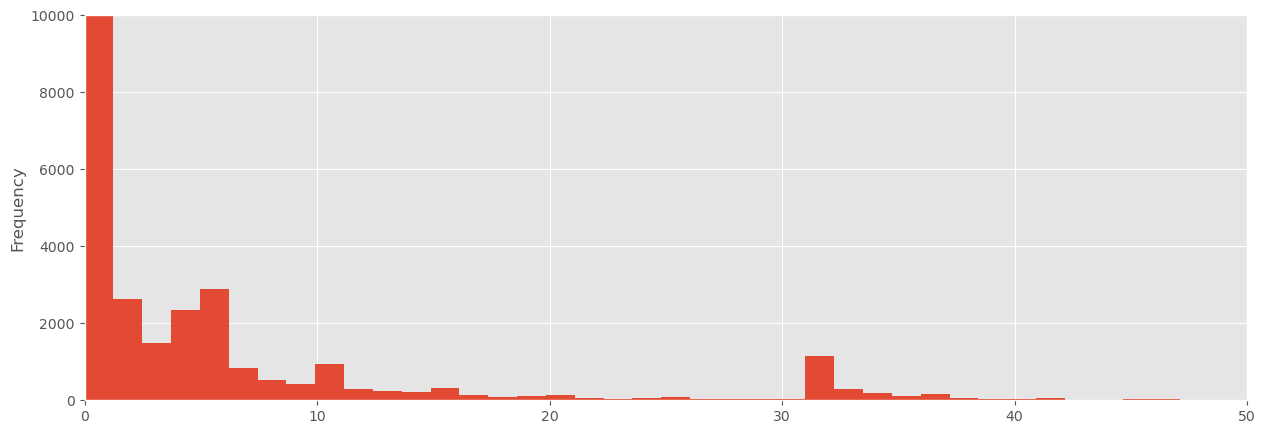

In [22]:
# Start by just plotting what we previously grouped!

plt.style.use('ggplot')
fig = plt.figure(figsize=(15,5))
plt.subplot(1,1,1)

(dftest['Outcome Time'] / pd.to_timedelta(1, unit='D')).plot(kind='hist', bins=250)
# cleaning outliers and 1 day which are outpatients (bring in dead, bring in to euthanize, medical care)
plt.xlim([0, 50])
plt.ylim([0, 10000])

plt.show()


Using this histogram, we see that there is a quad modal distribution for the outcomes for the animals at the shelter. 
Most animal outcomes occur during the first couple of days of their arrival [0,2] in the shelter
There are also modes at days 5, 10 and 30.
Our initial hypothesis is that 5, 10 and 30 are animals that need to be treated or need to be treated before
being put up for adoption
Further analyzing the dataset will reveal if the hypothesis is true or not.
While outcomes in days 0 to 2 are most likely either euthanasia, dead on arrival, or outpatient care provided by the pound


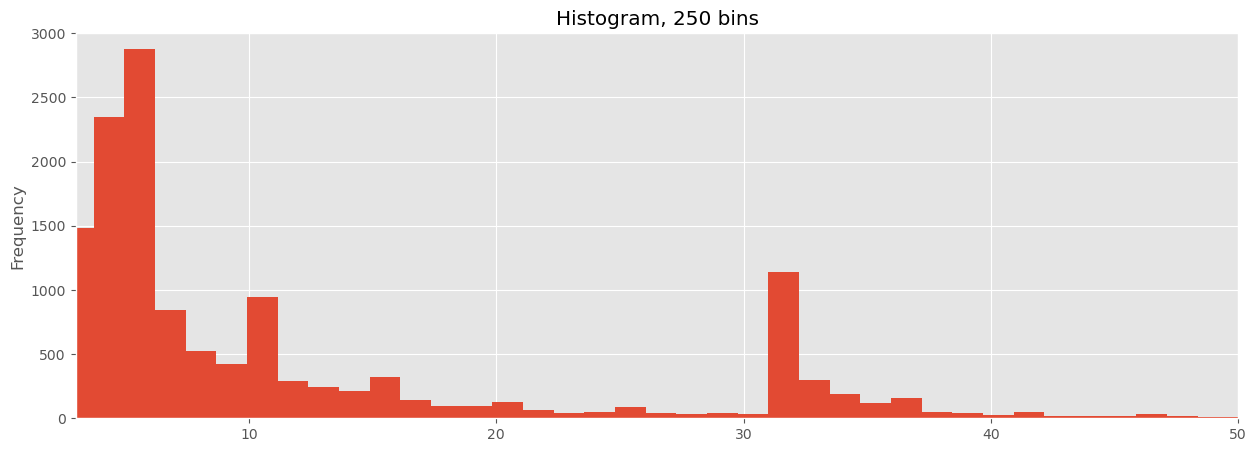

In [24]:
# Start by just plotting what we previously grouped!

plt.style.use('ggplot')
fig = plt.figure(figsize=(15,5))
plt.subplot(1,1,1)
(dftest['Outcome Time'] / pd.to_timedelta(1, unit='D')).plot(kind='hist', bins=250)
plt.title('Histogram, 250 bins')

# cleaning outliers and 1 day which are outpatients (bring in dead, bring in to euthanize, medical care)
plt.xlim([3, 50])
plt.ylim([0, 3000])

plt.show()


Therefore disregarding immediate outcomes this what the outcomes look like in frquency vs days of residence.
These longer term outcomes would signify adoption, euthanasia, or eventual demise from desease that could be overcome


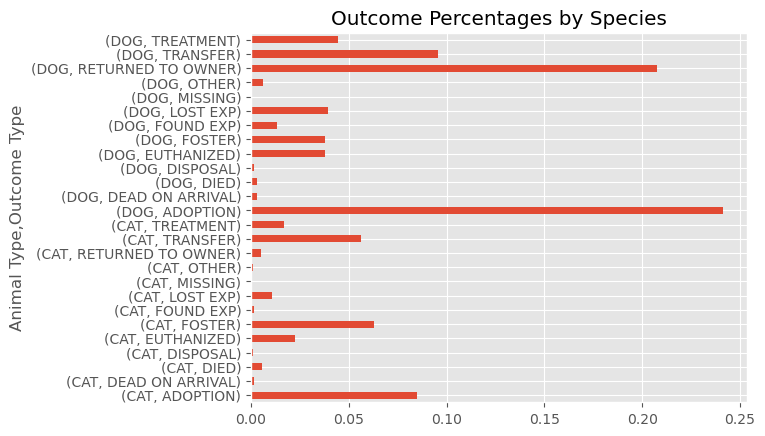

In [26]:
# first group the data
dftest_grouped = dftest.copy()

dftest_grouped = dftest_grouped.groupby(by=['Animal Type', 'Outcome Type']) #,'Animal Breed'])

# tabulate survival rates of each group
survival_rate = dftest_grouped['Outcome Type'].count() / 30580

# show in a bar chart using builtin pandas API
ax = survival_rate.plot(kind='barh')
plt.title('Outcome Percentages by Species')
plt.show()

Q1 What is the most likely outcome for an animal at the ASPCA?

The largest outcomes are quite positive, we can see treatment, returned to owner, adoption, and foster lead by far the outcomes.



In [28]:
import seaborn as sns
# Start by just plotting what we previously grouped!

print(list(dftest['Outcome Type'].unique()))

# first group the data
dftest2 = dftest.copy()

# Sample code to add a "Good Outcome" column to your DataFrame
good_outcomes = ['FOSTER', 'ADOPTION', 'RETURNED TO OWNER', 'TRANSFER', 'FOUND EXP', 'TREATMENT', 'OTHER']
bad_outcomes = ['EUTHANIZED', 'LOST EXP', 'DIED', 'DEAD ON ARRIVAL', 'MISSING', 'DISPOSAL']

# Using a lambda function to map the outcomes to either 0 (good) or 1 (bad)
dftest2['Good Outcome'] = dftest2['Outcome Type'].apply(lambda x: 0 if x in good_outcomes else 1 if x in bad_outcomes else None)

# Display the unique values in the new "Good Outcome" column
print(dftest2['Good Outcome'].unique())

with pd.option_context('display.max_rows', 20):
    print(dftest2[['Outcome Type', 'Good Outcome']].head(20))

dftest2.info()

['FOSTER', 'ADOPTION', 'RETURNED TO OWNER', 'TRANSFER', 'EUTHANIZED', 'FOUND EXP', 'LOST EXP', 'DIED', 'TREATMENT', 'DEAD ON ARRIVAL', 'MISSING', 'OTHER', 'DISPOSAL']
[0 1]
         Outcome Type  Good Outcome
0              FOSTER             0
1            ADOPTION             0
3   RETURNED TO OWNER             0
4            ADOPTION             0
5   RETURNED TO OWNER             0
6            TRANSFER             0
7            TRANSFER             0
8            ADOPTION             0
9            ADOPTION             0
10           ADOPTION             0
11  RETURNED TO OWNER             0
12         EUTHANIZED             1
13  RETURNED TO OWNER             0
14  RETURNED TO OWNER             0
15             FOSTER             0
16           ADOPTION             0
17          FOUND EXP             0
18           ADOPTION             0
19  RETURNED TO OWNER             0
20           LOST EXP             1
<class 'pandas.core.frame.DataFrame'>
Index: 30580 entries, 0 to 31917


Blue 0 is a good outcome, yellow 1 is a bad outcome


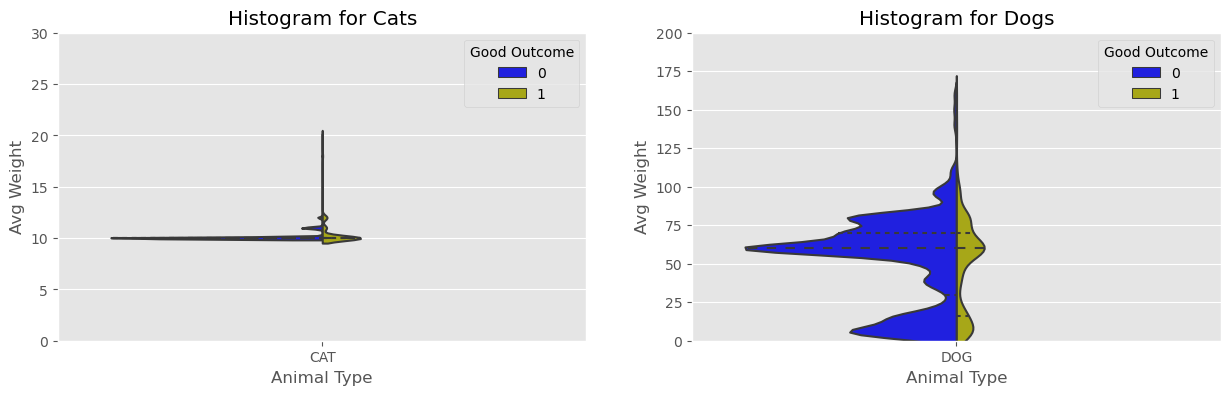

In [29]:
print('Blue 0 is a good outcome, yellow 1 is a bad outcome')
palette_colors = {0: 'b', 1: 'y'}
plt.style.use('ggplot')
fig = plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.violinplot(x="Animal Type", y="Avg Weight", hue="Good Outcome", 
               data=dftest2[dftest2['Animal Type'] == 'CAT'],
               split=True,
               inner="quart",
               scale="count",
               palette=palette_colors)
plt.ylim([0, 30])
plt.title('Histogram for Cats')

plt.subplot(1,2,2)
sns.violinplot(x="Animal Type", y="Avg Weight", hue="Good Outcome", data=dftest2[dftest2['Animal Type'] == 'DOG'],
               split=True, # split across violins
               inner="quart", # show innner stats like mean, IQR, 
               scale="count",
               palette=palette_colors) # scale the size of the plot by the count within each group              )
plt.ylim([0, 200])
plt.title('Histogram for Dogs')


# cleaning outliers and 1 day which are outpatients (bring in dead, bring in to euthanize, medical care)
#plt.xlim([0, 10])

plt.show()

Q2 Does animal size correlate to theur outcome?

The graphs above highlight the distrubution of outcomes based on their average weight for each type of aninmal. The violin plot shows us that the distribution of outcomes is trimodal. These representations however, are limited by the average weight component. The dataset lacked discrete weights, so we had to impute with the average for the animlas breed.

<Axes: >

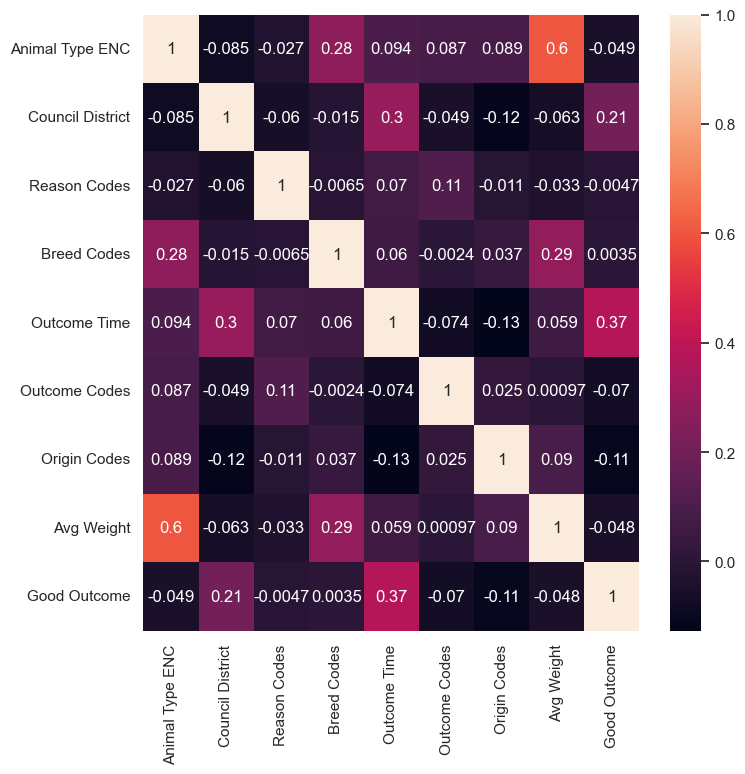

In [71]:
# the correlation plot is Feature based becasue we get
# a place in the plot for each feature
# in this plot we are asking, what features are most correlated? 

dftest2['Outcome Time'] = dftest['Outcome Time'] / pd.to_timedelta(1, unit='D')
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Category' column
dftest2['Animal Type ENC'] = label_encoder.fit_transform(dftest2['Animal Type'])


vars_to_use = ['Animal Type ENC', 'Council District', 'Reason Codes', 'Breed Codes', 'Outcome Time', 'Outcome Codes', 'Origin Codes', 'Avg Weight', 'Good Outcome'] # pick vars
cmap = sns.set(style="darkgrid") # one of the many styles to plot using


f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(dftest2[vars_to_use].corr(), cmap=cmap, annot=True)

# f.tight_layout()

Q3. What feature most closely correlates with a good outcome?

The heat map above shows the correlative calues amongst features within the matix. Overall, many of the features appear to share a low correlation, however, the Good Outcome and Council District features share a relativelty high positive correlation. This may be useful when deciding how to weight feature importance later on.


# Implement Dimensionality

In [35]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

C:\Users\pfnel\anaconda3\envs\py311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


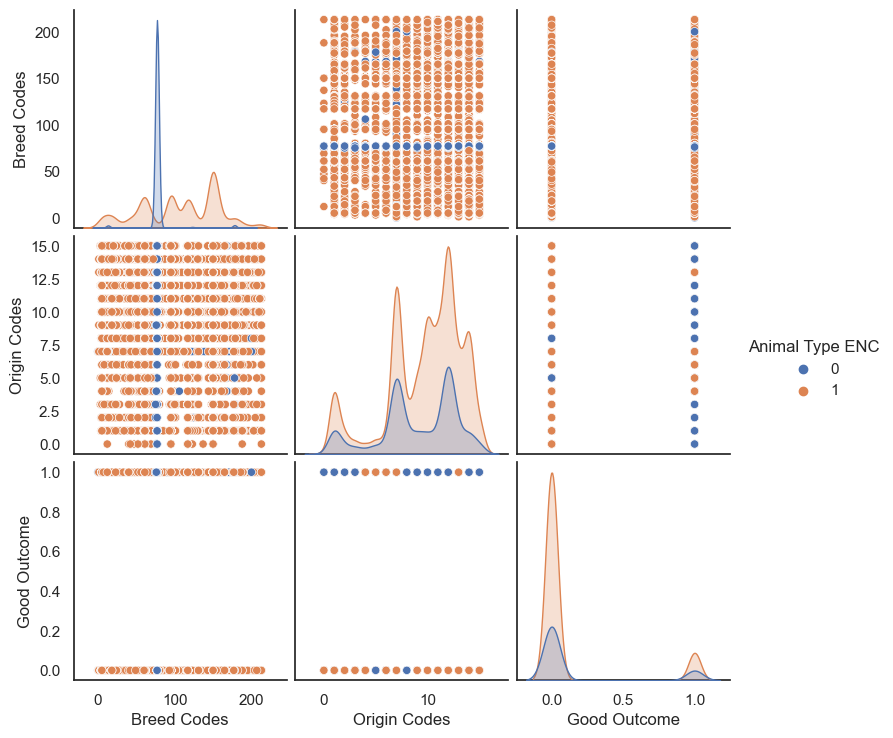

In [49]:
import umap
reducer = umap.UMAP()
vars_to_use2 = ['Animal Type ENC', 'Breed Codes', 'Origin Codes', 'Good Outcome']
dfumap=dftest2[vars_to_use2].copy()
sns.pairplot(dfumap, hue='Animal Type ENC');

In [45]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [47]:
Animal_data = dfumap[
    [
        'Animal Type ENC', 'Breed Codes', 'Origin Codes', 'Good Outcome'
    ]
].values
scaled_animal_data = StandardScaler().fit_transform(Animal_data)

In [50]:
embedding = reducer.fit_transform(scaled_animal_data)
embedding.shape

(30580, 2)

Text(0.5, 1.0, 'UMAP projection of the ASPCA dataset')

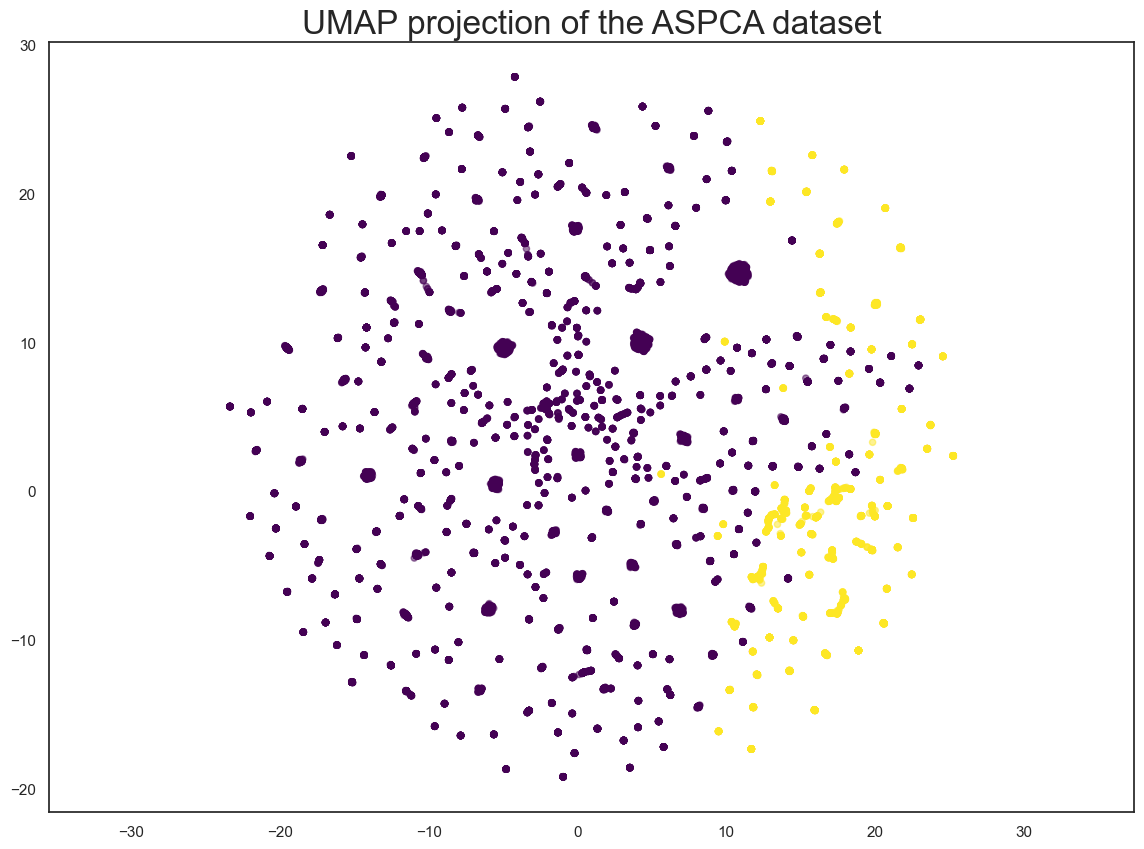

In [70]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c= dfumap['Good Outcome'],
    cmap='viridis',            # Colormap for coloring the dots (you can change it to another colormap)
    marker='o',                # Marker style (circle)
    s=20,                      # Marker size
    alpha=0.5 
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the ASPCA dataset', fontsize=24)

This UMAP shows a clustering of outcomes not to the extent that we would like.  Since the scatter plots earlier did not show much correlation between features, we were not expecting a large amount of clustering in the UMAP. But what it does show is good outcomes -yellow (animals surviving / being adopted / returned to owners) are mostly clustered on the left side of the graph. Whereas the negative outcome of animals -purple (being put down / dying) being clustered on the right side. There are also mini clusters within the data that point to certain features being better correlated than others, and that is supported by the heat map of correlation that was created above